In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [20]:
past_loans = pd.read_csv("data/PastLoans.csv")
past_loans_encoded = past_loans.copy()

# Encode dummy variable
le = LabelEncoder()
le.fit(past_loans["employment"])
employement = le.transform(past_loans["employment"])
past_loans_encoded["employment"] = employement


# Min max income
mm = MinMaxScaler()
mm.fit(past_loans["income"].array.reshape(-1, 1))
income = mm.transform(past_loans["income"].array.reshape(-1, 1))
past_loans_encoded["income"] = income
past_loans_encoded

,sex,employment,married,income,digital1,digital2,digital3,default
0,1,0,1,0.033610,0.705613,0.068107,0.167038,0
1,1,0,1,0.020650,0.000000,0.091152,0.000000,1
2,1,0,1,0.008504,0.637625,0.000000,0.066207,0
3,1,0,1,0.018460,0.276120,0.548380,0.625448,0
4,0,0,0,0.008811,0.001974,0.500731,0.000000,1
...,...,...,...,...,...,...,...,...
99995,0,1,1,0.024785,0.000000,0.206613,0.000000,1
99996,1,0,1,0.023353,0.000000,0.499002,0.367185,0
99997,1,0,1,0.006770,0.000000,0.125227,0.000000,0
99998,1,2,0,0.061856,0.807840,0.827529,0.772643,0


# EDA

<Axes: >

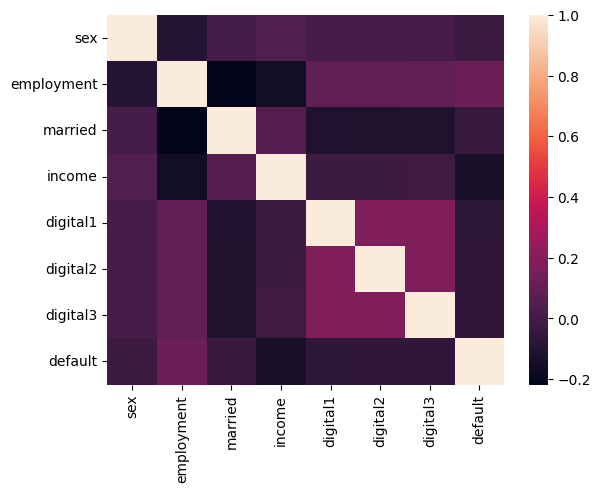

In [23]:
sns.heatmap(past_loans_encoded.corr())

In [27]:
Counter(past_loans_encoded["default"])

Counter({0: 77508, 1: 22492})

# Model

In [37]:
X = past_loans_encoded.drop("default", axis=1)
y = past_loans_encoded["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = XGBClassifier(scale_pos_weight=22492/77508, tree_method="gpu_hist")

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

KeyboardInterrupt: 

# Output